<a href="https://colab.research.google.com/github/rd27995/Kaggle_Competition/blob/master/Customer_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import the essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

import plotly.plotly as py
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [0]:
import plotly
plotly.tools.set_credentials_file(username='rahul_rd', api_key='4e1W4nz6b3xxG567gv01')


In [0]:
##Read the data

data = pd.read_csv('train.csv')


In [3]:
## Get the shape
data.shape

(200000, 202)

In [0]:
##Take a glimpse
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
from IPython.display import display

In [0]:
pd.options.display.max_rows = None

In [0]:
data.head(n = 10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [0]:
data.dtypes

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
var_29     float64
var_30     float64
var_31     float64
var_32     float64
var_33     float64
var_34     float64
var_35     float64
var_36     float64
var_37     float64
var_38     float64
var_39     float64
var_40     float64
var_41     float64
var_42     float64
var_43     float64
var_44     float64
var_45     float64
var_46     float64
var_47     float64
var_48     float64
var_49     float64
var_50     float64
var_51     f

In [0]:


data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [0]:
data = data.loc[:, data.columns != 'ID_code']

In [0]:
X = data.loc[:, data.columns != 'target']


In [6]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
y = data.iloc[:,0]

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
#build a basic logit model

from sklearn.model_selection import train_test_split

In [0]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=123)



In [13]:
y_train.head()

125714    0
149585    0
27244     0
136859    0
154257    0
Name: target, dtype: int64

In [0]:
type(y_train)

pandas.core.series.Series

In [0]:
from sklearn.linear_model import LogisticRegression 

In [0]:
classifier = LogisticRegression ()


In [0]:
classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_test,y_pred)

In [0]:
cm

array([[53201,   711],
       [ 4461,  1627]], dtype=int64)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=None)


In [0]:
metrics.auc(fpr, tpr)

0.6270294424417541

In [0]:
X_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000

In [0]:
#standard deviation is relatively large for both train and test variable data;
#min, max, sdt values for train and test data looks quite close;
#mean values are distributed over a large range

TypeError: unhashable type: 'numpy.ndarray'

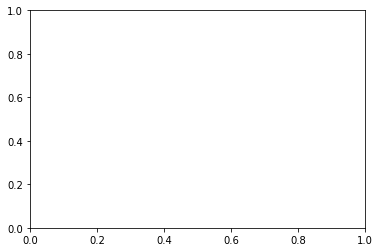

In [0]:
pca = PCA(n_components=None)

In [0]:
X_train = pca.fit_transform(X_train)

In [0]:
X_test = pca.fit_transform(X_test)

In [0]:
explained_variance = pca.explained_variance_

In [0]:
explained_variance

array([4.58579275e+02, 1.99362997e+02, 1.77171758e+02, 1.72881991e+02,
       1.59648714e+02, 1.46863876e+02, 1.43295710e+02, 1.35411833e+02,
       1.33547448e+02, 1.29517925e+02, 1.18357007e+02, 1.12375779e+02,
       1.09071316e+02, 1.08167868e+02, 1.07118021e+02, 8.69717433e+01,
       8.43364324e+01, 8.06846190e+01, 7.94996044e+01, 7.77677526e+01,
       7.56932216e+01, 7.47571264e+01, 7.34928503e+01, 7.27457969e+01,
       7.21652110e+01, 7.04815851e+01, 6.88243844e+01, 6.83757152e+01,
       6.73229222e+01, 6.66190950e+01, 6.41579427e+01, 6.37179997e+01,
       6.33498774e+01, 6.23004288e+01, 6.21096141e+01, 6.16501588e+01,
       6.15983897e+01, 6.07200175e+01, 5.97779515e+01, 5.90006434e+01,
       5.76513837e+01, 5.75797830e+01, 5.64988340e+01, 5.58042375e+01,
       5.52135335e+01, 5.48331449e+01, 5.36603504e+01, 5.06210976e+01,
       4.52652917e+01, 4.49887747e+01, 3.87801138e+01, 3.82214387e+01,
       3.79510701e+01, 3.67640347e+01, 3.56911377e+01, 3.55590046e+01,
      

In [0]:
X_std = StandardScaler().fit_transform(X)

In [0]:
X_std.shape[0]-1

199999

In [0]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000500e+00  5.23898537e-02  5.03428805e-02 ... -3.53029144e-02
  -5.29999064e-02  2.54346107e-02]
 [ 5.23898537e-02  1.00000500e+00 -5.43701961e-04 ... -7.52746424e-04
  -5.77572584e-03  3.84994710e-03]
 [ 5.03428805e-02 -5.43701961e-04  1.00000500e+00 ... -4.15698166e-03
  -4.86098030e-03  2.28713107e-03]
 ...
 [-3.53029144e-02 -7.52746424e-04 -4.15698166e-03 ...  1.00000500e+00
   1.18252954e-03  4.99057990e-03]
 [-5.29999064e-02 -5.77572584e-03 -4.86098030e-03 ...  1.18252954e-03
   1.00000500e+00 -4.73058354e-03]
 [ 2.54346107e-02  3.84994710e-03  2.28713107e-03 ...  4.99057990e-03
  -4.73058354e-03  1.00000500e+00]]


In [0]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [0]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()


# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
n=1
for i in eig_pairs:
    print(n)
    print(i[0])
    n=n+1

Eigenvalues in descending order:
1
1.5928181155311898
2
1.0605817478721706
3
1.0597358878429735
4
1.059355756419908
5
1.0575937275127303
6
1.0565574416145997
7
1.0559016035695026
8
1.0549554054861525
9
1.0531807213909994
10
1.0525881441116822
11
1.0511180492628849
12
1.049994865514093
13
1.0492693293654067
14
1.0473830014010335
15
1.0471726458089958
16
1.0470262021286392
17
1.0455229775216195
18
1.0447751942895622
19
1.043864966543769
20
1.043659302265864
21
1.042999874904708
22
1.0420425352668676
23
1.0414825011086306
24
1.0405292964453963
25
1.0399565465656153
26
1.0389129515899234
27
1.0386050509571623
28
1.0385214482116658
29
1.0374984663421114
30
1.036777095501872
31
1.0365847458132087
32
1.0356850562695608
33
1.0347979895534192
34
1.033882027780681
35
1.0333206649083568
36
1.033201134995051
37
1.0324900882305268
38
1.0319814608492752
39
1.0309544959048393
40
1.0306829368107127
41
1.0300612663478121
42
1.0290122923426994
43
1.0285859612776327
44
1.0283008370504811
45
1.02741280762

In [0]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [0]:
trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,201)]
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,201)]
    y=cum_var_exp,
    name='Cumulative'
)


SyntaxError: invalid syntax (<ipython-input-70-03f3f936a733>, line 4)

In [0]:
trace1

{'type': 'bar',
 'x': ['PC 1',
  'PC 2',
  'PC 3',
  'PC 4',
  'PC 5',
  'PC 6',
  'PC 7',
  'PC 8',
  'PC 9',
  'PC 10',
  'PC 11',
  'PC 12',
  'PC 13',
  'PC 14',
  'PC 15',
  'PC 16',
  'PC 17',
  'PC 18',
  'PC 19',
  'PC 20',
  'PC 21',
  'PC 22',
  'PC 23',
  'PC 24',
  'PC 25',
  'PC 26',
  'PC 27',
  'PC 28',
  'PC 29',
  'PC 30',
  'PC 31',
  'PC 32',
  'PC 33',
  'PC 34',
  'PC 35',
  'PC 36',
  'PC 37',
  'PC 38',
  'PC 39',
  'PC 40',
  'PC 41',
  'PC 42',
  'PC 43',
  'PC 44',
  'PC 45',
  'PC 46',
  'PC 47',
  'PC 48',
  'PC 49',
  'PC 50',
  'PC 51',
  'PC 52',
  'PC 53',
  'PC 54',
  'PC 55',
  'PC 56',
  'PC 57',
  'PC 58',
  'PC 59',
  'PC 60',
  'PC 61',
  'PC 62',
  'PC 63',
  'PC 64',
  'PC 65',
  'PC 66',
  'PC 67',
  'PC 68',
  'PC 69',
  'PC 70',
  'PC 71',
  'PC 72',
  'PC 73',
  'PC 74',
  'PC 75',
  'PC 76',
  'PC 77',
  'PC 78',
  'PC 79',
  'PC 80',
  'PC 81',
  'PC 82',
  'PC 83',
  'PC 84',
  'PC 85',
  'PC 86',
  'PC 87',
  'PC 88',
  'PC 89',
  'PC 90'

In [0]:
PCA_data = [trace1, trace2]

In [0]:
PCA_data

[{'type': 'bar',
  'x': ['PC 1',
   'PC 2',
   'PC 3',
   'PC 4',
   'PC 5',
   'PC 6',
   'PC 7',
   'PC 8',
   'PC 9',
   'PC 10',
   'PC 11',
   'PC 12',
   'PC 13',
   'PC 14',
   'PC 15',
   'PC 16',
   'PC 17',
   'PC 18',
   'PC 19',
   'PC 20',
   'PC 21',
   'PC 22',
   'PC 23',
   'PC 24',
   'PC 25',
   'PC 26',
   'PC 27',
   'PC 28',
   'PC 29',
   'PC 30',
   'PC 31',
   'PC 32',
   'PC 33',
   'PC 34',
   'PC 35',
   'PC 36',
   'PC 37',
   'PC 38',
   'PC 39',
   'PC 40',
   'PC 41',
   'PC 42',
   'PC 43',
   'PC 44',
   'PC 45',
   'PC 46',
   'PC 47',
   'PC 48',
   'PC 49',
   'PC 50',
   'PC 51',
   'PC 52',
   'PC 53',
   'PC 54',
   'PC 55',
   'PC 56',
   'PC 57',
   'PC 58',
   'PC 59',
   'PC 60',
   'PC 61',
   'PC 62',
   'PC 63',
   'PC 64',
   'PC 65',
   'PC 66',
   'PC 67',
   'PC 68',
   'PC 69',
   'PC 70',
   'PC 71',
   'PC 72',
   'PC 73',
   'PC 74',
   'PC 75',
   'PC 76',
   'PC 77',
   'PC 78',
   'PC 79',
   'PC 80',
   'PC 81',
   'PC 82',
   

In [0]:
layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=PCA_data, layout=layout)


In [0]:
py.iplot(fig)

In [0]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [0]:
sc = StandardScaler()

In [0]:
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

In [0]:
import lightgbm as lgb

In [0]:
d_train = lgb.Dataset(X_train1,y_train)

In [0]:
## Best Iteration

In [0]:
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_error'
params['n_thread'] = 3
params['num_leaves'] = 32
params['bagging_fraction'] = 0.75
params['subsample_for_bin'] = 200
params['bagging_freq'] = 1
params['colsample_bytree'] = 0.8
params['reg_alpha'] = 1
params['reg_lambda'] = 2
params['min_split_gain'] = 0.5
params['min_child_weight'] = 1
params['min_child_samples'] = 5
params['scale_pause_weight'] = 1
params['num_class'] =1
params['max_depth'] = 9
params['min_data_in_leaf'] = 1875
clf = lgb.train(params, d_train, 2000)

In [0]:
#Prediction
y_pred=clf.predict(X_test1)

       


In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=None)
metrics.auc(fpr,tpr)

0.8881919042155668

In [0]:
y_pred

array([0.0659074 , 0.14543684, 0.02884556, ..., 0.00472026, 0.0491964 ,
       0.00732772])

In [0]:
customers = pd.read_csv('test.csv')

In [82]:
customers.shape

(200000, 201)

In [0]:
customers_w = customers.loc[:, customers.columns != 'ID_code']

In [84]:
customers_w.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
#Submission Prediction
y_pred=clf.predict(customers_w)


In [0]:
y_pred.dtype

dtype('float64')

In [118]:
len(y_pred)

200000

In [0]:
sub_df = pd.DataFrame({"ID_code": customers["ID_code"].values})

In [0]:
sub_df['Target'] = y_pred

In [121]:
sub_df.head(n=10)

,ID_code,Target
0,test_0,0.942375
1,test_1,0.860371
2,test_2,0.910192
3,test_3,0.929126
4,test_4,0.891787
5,test_5,0.831328
6,test_6,0.800909
7,test_7,0.914928
8,test_8,0.791179
9,test_9,0.670769


In [0]:
## To check the values in the outcome of test data

sub2_df = pd.DataFrame({"Check":y_pred})


In [0]:
sub2_df.Check.value_counts()

0.0    197752
1.0      2248
Name: Check, dtype: int64

In [122]:
y_pred.min()

0.41182597615515787

In [0]:
## Excel

sub_df.to_csv('Submission_5',sep = ',')

In [0]:
#convert into binary values
for i in range(0,len(X_test)):
    if y_pred[i]>=.5:      
       y_pred[i]=1
       
    else:  
       y_pred[i]=0